In [2]:
import tensorflow as tf
import keras as ks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

Using TensorFlow backend.


In [4]:
#Step 1: Read the data and split into train and test
model_cat = pd.read_csv(r"C:\Users\Odh05\Desktop\Ai_training\cats.csv")
model_cat.head()

,Unnamed: 0,Sex,Bwt,Hwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


In [5]:
np.random.seed = 999
x_train, x_test, y_train, y_test = train_test_split(model_cat["Bwt"],model_cat["Hwt"], test_size = 0.3)

In [6]:
#Step 2: Define the model architecture

model_cat = Sequential()
model_cat.add(Dense(4, activation="relu", input_dim=1)) #input layer
model_cat.add(Dense(6, activation="relu")) #hidden layer
model_cat.add(Dense(1, activation="linear")) #output layer
model_cat.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Step 3: Compile the model
model_cat.compile(loss="mse", optimizer="RMSProp", metrics=["mse"])

Instructions for updating:
Use tf.cast instead.


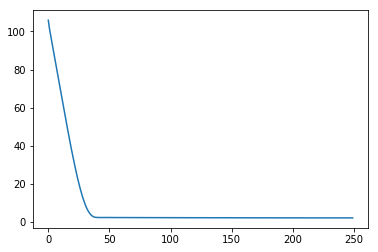

In [8]:
#Step 4: Train the model
model_diag = model_cat.fit(x_train, y_train, batch_size = 10, epochs = 250, verbose = 0)
model_epoc_values = model_diag.history['loss']
plt.plot(model_epoc_values)
plt.show()

In [9]:
model_diag.history.keys()

dict_keys(['loss', 'mean_squared_error'])

In [10]:
#Step 5: Predict
pred = [5.0,7.0]
new = model_cat.predict(pred)

In [11]:
def fn_differences(act,pred):
    error = act-pred
    abs_error = abs(error)
    percent_error = (error)/act
    
    mean_abs_error = np.mean(abs_error)
    mean_abs_percentage_error = np.mean(percent_error)
    
    return mean_abs_percentage_error

In [12]:
predicted_y_train = model_cat.predict(x_train)
act = y_train.iloc[1]
train_error = fn_differences(act,predicted_y_train)

In [13]:
error = abs(predicted_y_train - y_train.reshape(-1,1))
percent_error = (error)/predicted_y_train
mean_abs_error = np.mean(error)
mean_abs_percentage_error = np.mean(percent_error)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [14]:
print("Mean abs error: ",mean_abs_error)
print("Mean absolute percentage error: ", mean_abs_percentage_error)

Mean abs error:  1.1764946670532226
Mean absolute percentage error:  0.11261367312727089


In [15]:
model_cat2 = Sequential()
model_cat2.add(Dense(4, activation="relu", input_dim=1)) #input layer
model_cat2.add(Dense(6, activation="relu", input_dim=1)) #hidden layer
model_cat2.add(Dense(1, activation="linear", input_dim=1)) #output layer
model_cat2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_cat2.compile(loss="mse", optimizer="adam", metrics=["mse"])

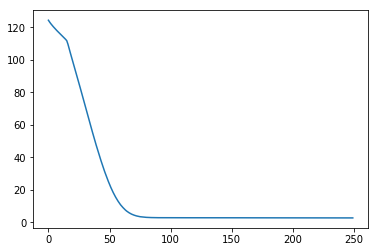

In [17]:
model_diag_adam = model_cat2.fit(x_train, y_train, batch_size = 10, epochs = 250, verbose = 0)
model_epoc_values_adam = model_diag_adam.history['loss']
plt.plot(model_epoc_values_adam)
plt.show()

In [18]:
def fn_dnn_model():
    num_of_hidden_layers = 1
    model_cat2 = Sequential()
    model_cat2.add(Dense(4,activation="relu",input_dim = 1))
    
    for i in range(num_of_hidden_layers):
        model_cat2.add(Dense(6,activation = "relu"))
        
    model_cat2.add(Dense(1, activation="linear"))
    model_cat2.compile(loss="mse", optimizer="adam", metrics=["mse"])
    return model_cat2

In [19]:
estimator = KerasRegressor(build_fn = fn_dnn_model, epochs = 200, batch_size = 10, verbose=0)
k_folds = KFold(n_splits = 10, random_state = 99)
Results = cross_val_score(estimator, x_train, y_train,cv = k_folds)
print(Results.mean())
print(Results.std())

-22.887227416038513
41.44705454711285
